# 0. Setup

### Import libraries

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np
%matplotlib notebook

### Initialize Blocksci

In [28]:
# Import blocksci
import blocksci

# Create a Blockhain object
# parser_data_directory should be set to the data-directory which the blocksci_parser output
#parser_data_directory = "/home/bitcoin/blocksci_parsed_output"
parser_data_directory = "/home/administrator/BlockSci/bitcoin-data"
chain = blocksci.Blockchain(parser_data_directory)

# 1. Basic stats

### How many blocks are there in the blockchain?

In [29]:
# The number of blocks is the length of the chain
%time num_blocks = (len(chain))
print(num_blocks)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 22.4 µs
6763


### What is the size of all serialized blocks in the blockchain?

In [30]:
# The size of the chain is the sum of the sizes of the blocks 
%time blockchain_size = sum([block.size_bytes for block in chain])
print(blockchain_size)

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 14.8 ms
14882563


In [31]:
# Convert sizes in bytes to gigabytes for readability
def bytes_to_gb(s):
    return s/1024**3

print(bytes_to_gb(blockchain_size))

0.01386046689003706


### How many transactions are there in the blockchain?

In [32]:
# The number of transactions of a block is the length of the block
# and the sum of transactions of each block is the total number of transactions in the chain
%time total_num_transactions = sum([len(block) for block in chain])
print(total_num_transactions)

CPU times: user 12 ms, sys: 8 ms, total: 20 ms
Wall time: 21.8 ms
37979


# 2. Basic queries

### Which is the hash of the block with the most number of transactions?

In [33]:
%time num_transactions = [len(block) for block in chain]
# Get max. number of transactions
m = max(num_transactions)
# Get height of the block with the most transactions
height = num_transactions.index(m)
# Retrieve hash

# Version v0.2: header_hash
#h = chain[height].header_hash
# Version v0.3: hash
h = chain[height].hash

print("The block with the most number of transactions is at height {} and has {} transactions". format(height, m))
print("Block hash: {}".format(h))


CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 14.7 ms
The block with the most number of transactions is at height 450 and has 121 transactions
Block hash: 283a9ff1083fc9fb772cbcc657236eea9d41b5fccadb3b32a967273883f002b7


In [34]:
# An alternative, using numpy:
height = np.argmax(num_transactions)
m = len(chain[height])
# Version v0.2: header_hash
#h = chain[height].header_hash
# Version v0.3: hash
h = chain[height].hash

print("The block with the most number of transactions is at height {} and has {} transactions". format(height, m))
print("Block hash: {}".format(h))

The block with the most number of transactions is at height 450 and has 121 transactions
Block hash: 283a9ff1083fc9fb772cbcc657236eea9d41b5fccadb3b32a967273883f002b7


### Which is the transaction in block 657 with the most value in outputs?

In [35]:
# Get block
block = chain[357]
# Get output amounts per transaction
outvalue_per_tx = [sum(out.value for out in tx.outs) for tx in block]
# Select max amount
max_value = max(outvalue_per_tx)
tx_index = outvalue_per_tx.index(max_value)
# Retrieve hash
tx = block[tx_index].hash
print("The transaction with the most value in outputs (block 123456) is {} and has {} satoshis". format(tx_index, max_value))
print("Tx hash: {}".format(tx))

The transaction with the most value in outputs (block 123456) is 0 and has 1250000000 satoshis
Tx hash: b787ee31d6c8d2f01f0123bd62fea729bcc464462a311a92ee8d261acfa70cfd


In [36]:
# Converts satoshi to btc
def satoshis_to_btc(v):
    return v/10**8

In [37]:
max_value_btc = satoshis_to_btc(max_value)
print("The transaction with the most value in outputs (block 657) has {} btc". format(max_value_btc))

The transaction with the most value in outputs (block 657) has 12.5 btc


### How many blocks do not have any fees at all?

In [38]:
# Get blocks without fees
# Version v0.2: fees
#%time blocks_without_fees = [block for block in chain if sum(block.fees) == 0]
# Version v0.3: txes.fee
%time blocks_without_fees = [block for block in chain if sum(block.txes.fee) == 0]
# Show how many did we find
print("There are {} blocks without paying any fees to the miner".format(len(blocks_without_fees)))

CPU times: user 28 ms, sys: 4 ms, total: 32 ms
Wall time: 30.4 ms
There are 2979 blocks without paying any fees to the miner


# 3. Plots with block and transaction data

### How many transactions per block are there?

In [39]:
# Get number of transactions per block
%time num_transactions = [(block.height, len(block)) for block in chain]

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 19 ms


<IPython.core.display.Javascript object>


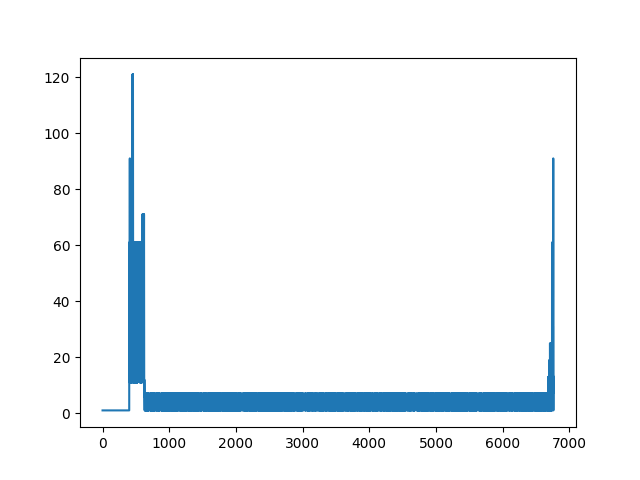

In [40]:
# Plot number of transactions vs block height
fig, ax = plt.subplots()
df_num_tx = pd.DataFrame(num_transactions, columns=["Height", "Num. of tx"])
ax.plot(df_num_tx["Height"], df_num_tx["Num. of tx"])

In [41]:
# We can use heights_to_dates to convert block heights into dates
df_num_tx_dates = chain.heights_to_dates(df_num_tx)
df_num_tx_dates=df_num_tx_dates.drop('2011-02-03 00:16:42')

In [16]:
df_num_tx_dates

,Height,Num. of tx
2018-03-22 17:05:24,1,1
2018-03-22 17:05:25,2,1
2018-03-22 17:05:25,3,1
2018-03-22 17:05:26,4,1
2018-03-22 17:05:26,5,1
2018-03-22 17:05:26,6,1
2018-03-22 17:05:26,7,1
2018-03-22 17:05:27,8,1
2018-03-22 17:05:27,9,1
2018-03-22 17:05:27,10,1


<IPython.core.display.Javascript object>


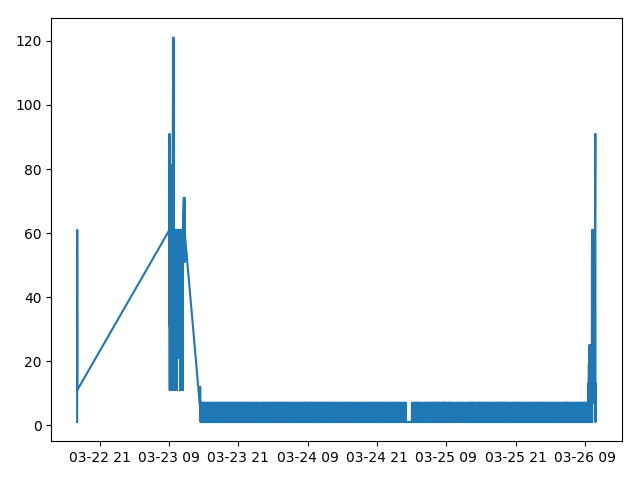

In [44]:
# Plot number of transactions vs date
fig, ax = plt.subplots()
# Version v0.2: we can use plot_date
#ax.plot_date(df_num_tx_dates.index, df_num_tx_dates["Num. of tx"], fmt=".")
# Version v0.3: plot_date generates an error:
ax.plot(df_num_tx_dates.index, df_num_tx_dates["Num. of tx"])
plt.tight_layout()

#### Which is the first block with more than one transaction?

In [45]:
for (height, num_tx) in num_transactions:
    if num_tx > 1:
        break
        
print("The first block with more than one transaction is at height {}".format(height))

The first block with more than one transaction is at height 401


### Are blocks currently full?

In [46]:
# Get block sizes
%time block_sizes = [(block.height, block.size_bytes) for block in chain]

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 17.6 ms


<IPython.core.display.Javascript object>


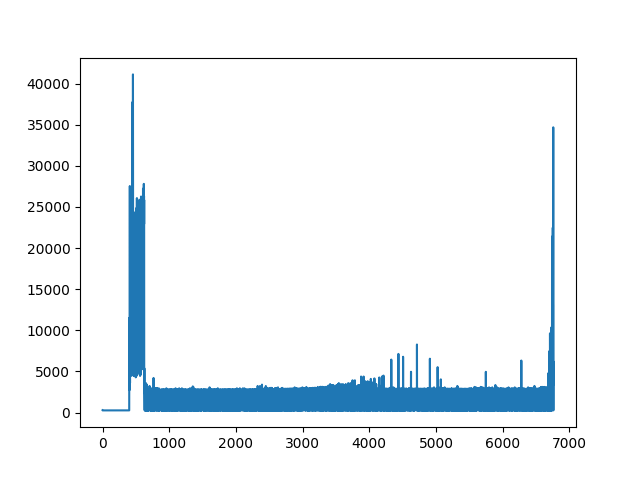

In [47]:
# Plot block size vs block height
fig, ax = plt.subplots()
df_num_tx = pd.DataFrame(block_sizes, columns=["Height", "Block size (bytes)"])
ax.plot(df_num_tx["Height"], df_num_tx["Block size (bytes)"])
# Show an orange line on 80% of max. block size, red line on 90%
max_block_size = 1024*1024
#ax.plot([0, num_blocks], [0.8*max_block_size, 0.8*max_block_size], "orange")
#ax.plot([0, num_blocks], [0.9*max_block_size, 0.9*max_block_size], 'r')

### How random nonces are?

In [48]:
%time block_nonces = [(block.height, block.nonce) for block in chain]

CPU times: user 16 ms, sys: 4 ms, total: 20 ms
Wall time: 16.6 ms


<IPython.core.display.Javascript object>


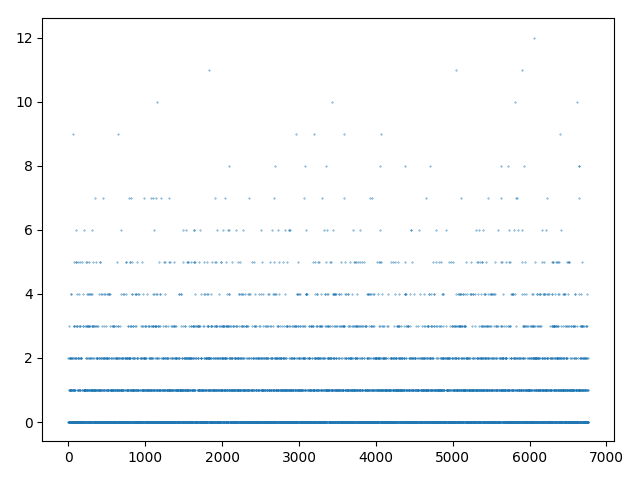

In [49]:
fig, ax = plt.subplots()
df_nonces = pd.DataFrame(block_nonces, columns=["Height", "Nonce"])
plt.scatter(df_nonces["Height"], df_nonces["Nonce"], s=0.1)
plt.tight_layout()

### A note on resampling: how much fees were paid by block?

In [50]:
# Get fees per block
# Version v0.2: fees
#%time fees_per_block = [(block.time, sum(block.fees)) for block in chain]
# Version v0.3: txes.fee
%time fees_per_block = [(block.time, sum(block.txes.fee)) for block in chain]

CPU times: user 68 ms, sys: 12 ms, total: 80 ms
Wall time: 75.2 ms


<IPython.core.display.Javascript object>


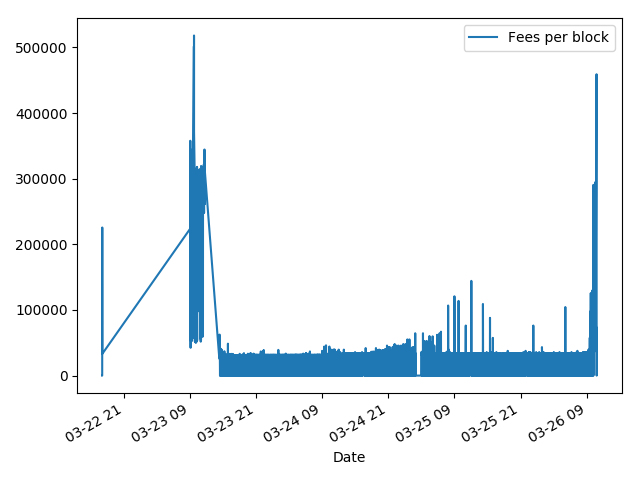

In [51]:
# Load data into dataframe
df_fees_block = pd.DataFrame(fees_per_block, columns=["Date", "Fees per block"])
# Set dataframe index as date
df_fees_block.index = df_fees_block["Date"]
df_fees_block=df_fees_block.drop('2011-02-03 00:16:42')
del df_fees_block["Date"]

# Resample?
# df_fees_block = df_fees_block.resample("w").mean()
# df_fees_block = df_fees_block.resample("m").mean()
df_fees_block.plot()
plt.tight_layout()

## Comparing actual block vs previous blocks

6605


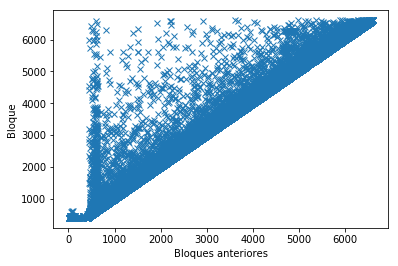

In [25]:
numbloques = max([block.height for block in chain])
print (numbloques)
numbloque = ([block.height for block in chain])
totantbloques = []
tottrans = []
numtotbloques = []
antbloques = []
bloquedes = []
for b in numbloque:
    bloque = chain[b]
    trans = bloque.txes
    inputs = trans.inputs
    addresses = inputs.address
    ages = inputs.age
    #obtenemos información de los bloques anteriores
    direcciones = []
    info_bloques = []
    for i in addresses:
        for j in i:
            direcciones.append(j)
    for i in ages:
        for j in i:
            edades = j
            bloque_origen = b - edades
            info_bloques.append(bloque_origen)
    bloques_input_tx = []
    for i in info_bloques:
        bloque_i = chain[i]
        bloques_input_tx.append(bloque_i)
    entradas2 = [(txes.inputs.age, txes.inputs.tx) for txes in bloque]
    salidas = []
    transacciones = []
    for i in entradas2:
        agges = i[0]
        in_tx = i[1]
        info_prev_block = []
        for j in agges:
            block_origen = b - j
            block_or_info = chain[block_origen]
            lista_outputs = block_or_info.outputs.tx
            info_prev_block.append(block_origen)
            antbloques.append(int(block_origen))
            bloquedes.append(int(b))
plt.plot(antbloques, bloquedes, 'x')
plt.xlabel('Bloques anteriores')
plt.ylabel('Bloque')
plt.show()

## Comparing actual block vs previous transactions

6605


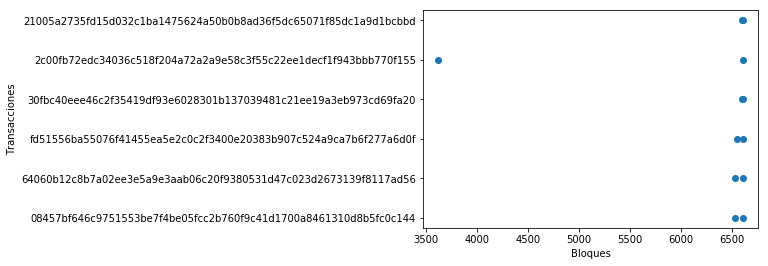

In [26]:
numbloques = max([block.height for block in chain])
print (numbloques)
#bloque=987
numbloque = num_blocks - 1
bloque = chain[numbloque]
trans = bloque.txes
inputs = trans.inputs
addresses = inputs.address
ages = inputs.age
#obtenemos información de los bloques anteriores
direcciones = []
info_bloques = []
for i in addresses:
    for j in i:
        direcciones.append(j)
for i in ages:
    for j in i:
        edades = j
        bloque_origen = numbloque - edades
        info_bloques.append(bloque_origen)
bloques_input_tx = []
for i in info_bloques:
    bloque_i = chain[i]
    bloques_input_tx.append(bloque_i)
entradas = [(txes.inputs.age, txes.inputs.address,txes.inputs.tx) for txes in bloque]
entradas2 = [(txes.inputs.age, txes.inputs.tx) for txes in bloque]
salidas = []
antbloques = []
transacciones = []
for i in entradas2:
    agges = i[0]
    in_tx = i[1]
    info_prev_block = []
    for j in agges:
        block_origen = numbloque - j
        block_or_info = chain[block_origen]
        lista_outputs = block_or_info.outputs.tx
        info_prev_block.append(block_origen)
        antbloques.append(int(block_origen))
    info_tx_index = []
    for j in in_tx:
        tx_index = j.index
        tx_hash = j.hash
        info_tx_index.append(tx_hash)
        transacciones.append(str(tx_hash))
    salidas.append([info_prev_block,info_tx_index])
plt.plot(antbloques, transacciones, 'o')
plt.xlabel('Bloques')
plt.ylabel('Transacciones')
plt.show()